In [14]:
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json

# Gathering Data

### Udactity File

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,12,10,Major,None,None,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
586,799774291445383169,NaN,NaN,2016-11-19 00:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tucker. He would like a...,7.750851e+17,4.196984e+09,2016-09-11 21:34:30 +0000,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None


### Using the url  provided in the project page we will download the `image-predictions`  for the images.

In [4]:
#folder_name = 'Project'
urls = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(urls)
with open (os.path.join(urls.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
df_images = pd.read_csv('image-predictions.tsv',delimiter='\t')

In [6]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Download `retweet_count` and `like_count` from twitter API 

In [10]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [80]:

df_api = []
tweet_data = {}
exceptions = []
tweet_id = df_twitter['tweet_id']

for id in tweet_id:
    try:
        #print(id)
        page = api.get_status(id)
       # tweet_data[str(id)] = page._json
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        df_api.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        #print(id)
        
    except Exception as e:
        exceptions.append(id)
        #print (e)
        print("exception: "+str(id))
print("Done")

exception: 888202515573088257
exception: 873697596434513921
exception: 869988702071779329
exception: 866816280283807744
exception: 861769973181624320
exception: 845459076796616705
exception: 842892208864923648
exception: 837012587749474308
exception: 827228250799742977
exception: 802247111496568832
exception: 775096608509886464


Rate limit reached. Sleeping for: 270
Rate limit reached. Sleeping for: 214


Done


In [81]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [82]:
df_api1 = pd.DataFrame.from_dict(df_api)
df_api1.to_csv('tweet_data.txt',index=False)

In [83]:
df_tweets = pd.read_csv('tweet_data.txt')

In [84]:
df_tweets.sample(5)

,favorites,retweets,tweet_id
1440,3413,854,695794761660297217
1215,3487,850,713919462244790272
500,8732,2172,812466873996607488
31,0,104,886054160059072513
1132,3548,816,727314416056803329


## Summary of Gathering Part:

- we have downloaded `twitter-archive-enhanced.csv` data set provide in project page and we are referenced it as `df_twitter`
- we programitically download the `image-predictions.tsv` dataset from the link provided in udacity pages and reference it as `df_images`.
- next we need retweet count and likes count for tweet_id present in df_twitter so we programitically hit API using tweepy module and fetch the counts and save it as dataset and latter reference it as `df_tweets`.

# Assess.

In [17]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None


In [18]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
df_twitter.rating_numerator.value_counts(sort = True)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
df_twitter.rating_denominator.value_counts(sort = True)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
pd.set_option('display.max_colwidth', -1)

In [20]:
 df_twitter[df_twitter['rating_denominator'] == 0]['text']


313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

### Note
- I had an for one of the records the denominator was zero so i just looked into the text there i saw that the numerator and denominators value were wrongly taken instead.So as mentioned in udacity page it was mention as `These ratings almost always have a denominator of 10` so just want to look for all the other text field of all the other denominator wheather value are correct or not

In [21]:
df_twitter[(df_twitter['rating_denominator'] < 10) | (df_twitter['rating_denominator'] > 10)]['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

####  Note as can be seen for few of the cases which has denominator > and < 10 has wrong rating

we handle this in cleaning section

In [22]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [23]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False


In [24]:
df_images.img_num.value_counts(sort=True)

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [25]:
df_twitter['tweet_id'].count(), df_images['tweet_id'].count(),df_tweets['tweet_id'].count()

(2356, 2075, 2345)

#### Quality issue
- In df_twitter dataframe, columns like (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp) contains mostly null value and cannot be used for analysis.
- In df_images dataframe, img_num column is not required. 
- time stamp data type is object instead as date time.
- few names are mention as article 'a', 'the','an'
- rating_denominator column for one of the record is '0' which is i am assuming is because of some error.
- count of tweeter id in all the dataset is different. 
- numerator and denominator rating are not correct.


#### Tideness Issue
- Doggo,floofer,pupper,puppo is used as columns.
- There is 2 columns rating_numerator and rating_denominator which can be merged as 'rating' instead.
- The columns for dog breed predictions can be condensed.
- df_images and df_tweets, df_twitter can be merged into one dataset.

# Cleaning

#### Define
- Time stamp data type is object instead as date time.

#### Code

In [26]:
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'])

#### Test


In [27]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Define
- few of the names are article.

#### Code

In [28]:
df_twitter.loc[(df_twitter['name']=='a')|(df_twitter['name']=='an')|(df_twitter['name']=='the'),'name'] = None

#### Test

In [29]:
df_twitter[(df_twitter['name']=='a')|(df_twitter['name']=='an')|(df_twitter['name']=='the')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
df_twitter['name'].value_counts(sort = True)

None          745
Charlie       12 
Lucy          11 
Cooper        11 
Oliver        11 
Tucker        10 
Penny         10 
Lola          10 
Winston       9  
Bo            9  
Sadie         8  
Buddy         7  
Daisy         7  
Toby          7  
Bailey        7  
Jack          6  
Oscar         6  
Jax           6  
Dave          6  
Koda          6  
Stanley       6  
Leo           6  
Milo          6  
Scout         6  
Bella         6  
Rusty         6  
Oakley        5  
Sunny         5  
Larry         5  
George        5  
             ..  
Petrick       1  
Zuzu          1  
Strudel       1  
Murphy        1  
Ivar          1  
Sid           1  
Ito           1  
Eugene        1  
Reagan        1  
Hubertson     1  
Schnitzel     1  
Alexander     1  
Raphael       1  
Dotsy         1  
Saydee        1  
Brownie       1  
Gabby         1  
my            1  
Ralpher       1  
Winifred      1  
Aubie         1  
Anna          1  
Mitch         1  
Arlo          1  
Brandonald

#### Define
- rating_denominator and rating denominator value are incorrect. manually correcting.

#### Code

In [31]:
df_twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [32]:
wrong_index = list(df_twitter[(df_twitter['rating_denominator'] < 10) | (df_twitter['rating_denominator'] > 10)].index)
wrong_index
for idx in wrong_index:
    s = df_twitter.at[idx, 'text']
    i = s.rfind('/10')
    if (i > 0):
        num = s[i-2:i]
        #print(s)
        print(num)
        df_twitter.at[idx,'rating_numerator'] = num
        df_twitter.at[idx,'rating_denominator'] = 10
    else:
        print('else')
        #print(s)
        continue
        
    

13
else
else
else
14
else
14
else
13
11
else
else
else
else
else
else
else
else
10
else
else
else
 9


#### Test

In [33]:
# count reduced from 23 to 16
df_twitter[(df_twitter['rating_denominator'] < 10) | (df_twitter['rating_denominator'] > 10)]['tweet_id'].count()

16

In [34]:
#df_twitter[df_twitter['tweet_id']].duplicated()

In [35]:
#df_twitter.loc[df_twitter.rating > 2,['tweet_id','text','rating']]

#### Define

- Condensing stages of Dogs:

doggo

floofer

pupper

puppo

None

#### Code

In [36]:
#df_twitter[df_twitter['doggo'] == 'None']

In [37]:
df_twitter['stage'] = df_twitter[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_twitter['stage'].replace("NoneNoneNoneNone","None", inplace=True)
df_twitter['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_twitter['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_twitter['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_twitter['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_twitter['stage'].replace("doggoNoneNonepuppo","puppo", inplace=True)
df_twitter['stage'].replace("doggoflooferNoneNone","floofer", inplace=True)



In [38]:
# it is very difficult to determine the stage programitically so replacing with combo.
df_twitter['stage'].replace("doggoNonepupperNone","None", inplace=True)

In [39]:
df_twitter['stage'].value_counts()

None       1988
pupper     245 
doggo      83  
puppo      30  
floofer    10  
Name: stage, dtype: int64

In [40]:
#df_twitter[df_twitter['stage']=='doggoNonepupperNone']['text']

` As there are records having 2 stages in a row so we cannot programitically decide the value.So manually need to change the stage.
For Few of them whos stage was ambigiuous , I deleted those rows`

#### Test

In [41]:
df_twitter['stage'].value_counts()

None       1988
pupper     245 
doggo      83  
puppo      30  
floofer    10  
Name: stage, dtype: int64

In [42]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,None,None,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Moreton. He's the Good Boy Who Lived. 13/10 magical as h*ck https://t.co/rLHGx3VAF3,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,"https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1",13,10,Moreton,None,None,None,None,None
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531465048066/video/1,13,10,None,None,None,None,None,None
1733,679777920601223168,NaN,NaN,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rinna. She's melting. 10/10 get inside pupper https://t.co/PA0czwucsb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679777920601223168/photo/1,10,10,Rinna,None,None,pupper,None,pupper
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've never seen a dog so genuinely happy about a tennis ball. 12/10 s'cute https://t.co/9RYY2NtHDw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384437997569/photo/1,12,10,None,None,None,None,None,None


#### Define
- Remove unecessary rows from df_twitter data frame

#### Code

In [43]:
df_twitter.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

#### Test

In [44]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id              2356 non-null int64
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2286 non-null object
stage                 2356 non-null object
dtypes: int64(3), object(2)
memory usage: 73.7+ KB


### Issue
#### Define
- Convert type of stage as categorical type

#### Code

In [45]:
df_twitter.stage = df_twitter.stage.astype('category')

#### Test

In [46]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id              2356 non-null int64
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2286 non-null object
stage                 2356 non-null category
dtypes: category(1), int64(3), object(1)
memory usage: 66.9+ KB


### Issue

#### Define
- There is 2 columns rating_numerator and rating_denominator which can be merged as 'rating' instead.

#### Code

In [47]:
df_twitter['rating']=df_twitter.rating_numerator/df_twitter.rating_denominator

In [48]:
df_twitter.drop(['rating_numerator','rating_denominator'],axis=1, inplace=True)

#### Test

In [49]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id    2356 non-null int64
name        2286 non-null object
stage       2356 non-null category
rating      2356 non-null float64
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 48.5+ KB


In [50]:
df_twitter.sample(5)

,tweet_id,name,stage,rating
2094,670778058496974848,None,None,1.0
5,891087950875897856,None,None,1.3
711,784517518371221505,Frankie,None,1.1
127,867900495410671616,None,None,1.2
823,770069151037685760,Carbon,None,1.0


#### Issue:
#### Define.
- merge p*_conf and p* to find the breed of dog 

#### Code


In [51]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [52]:

breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

df_images.apply(breed_conf, axis = 1)

df_images['breed'] = breed


In [53]:

#removing the processed columns
df_images.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','img_num'], axis=1, inplace=True)

#### Test

In [54]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
breed       2075 non-null object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


### Issue
#### Define
- convert breed to categorical variable

#### Code

In [55]:
df_images.breed = df_images.breed.astype('category')

In [56]:
#Test
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
breed       2075 non-null category
dtypes: category(1), int64(1), object(1)
memory usage: 29.8+ KB


#### Issue
#### Define
- Merge all the data frame to 1 data frame

In [57]:
df_clean = pd.merge(pd.merge(df_twitter,df_images,on='tweet_id'),df_tweets,on='tweet_id')

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 8 columns):
tweet_id     2069 non-null int64
name         2000 non-null object
stage        2069 non-null category
rating       2069 non-null float64
jpg_url      2069 non-null object
breed        2069 non-null category
favorites    2069 non-null int64
retweets     2069 non-null int64
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 104.6+ KB


In [59]:
df_clean = df_clean[df_clean['rating'] < 2]

In [60]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

# Analysis

In [61]:

%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('twitter_archive_master.csv')

In [63]:
print(df.describe())

           tweet_id       rating      favorites      retweets
count  2.063000e+03  2063.000000  2063.000000    2063.000000 
mean   7.381017e+17  1.059913     8533.434804    2874.036840 
std    6.769876e+16  0.216818     12470.208457   4866.529065 
min    6.660209e+17  0.000000     0.000000       13.000000   
25%    6.764355e+17  1.000000     1633.500000    612.500000  
50%    7.116948e+17  1.100000     3777.000000    1359.000000 
75%    7.931430e+17  1.200000     10757.000000   3343.000000 
max    8.924206e+17  1.500000     143551.000000  77468.000000


In [64]:
df1_clean = df

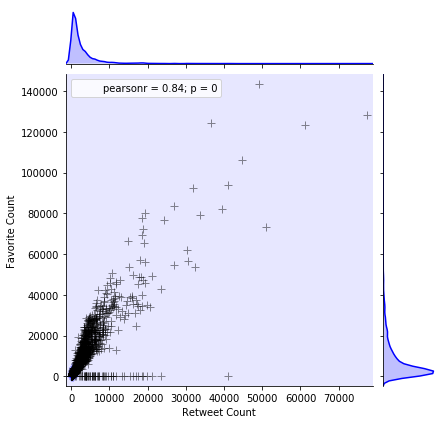

In [65]:
import seaborn as sns
g = sns.jointplot(x = 'retweets' ,y ='favorites', data = df1_clean,color="blue",
                  kind="kde")
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=10)


In [66]:
values=np.sort(df1_clean.rating.unique())
values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5])

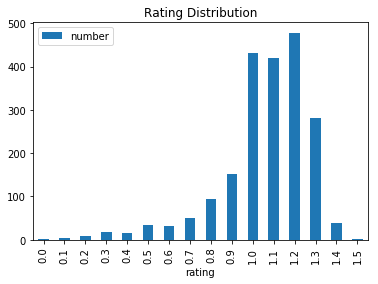

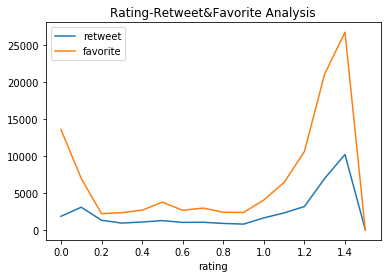

In [67]:
rating_analyze=pd.DataFrame(columns=['rating','number','retweets','favorites'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'number']=this_df['tweet_id'].count()
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweets.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorites.mean()
rating_analyze[['rating','number']].plot(x='rating',kind='bar', title='Rating Distribution')
rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating-Retweet&Favorite Analysis')

In [71]:
top_breeds = df1_clean[df1_clean['breed'] != 'Unidentifiable']

Text(0,0.5,'Breed')

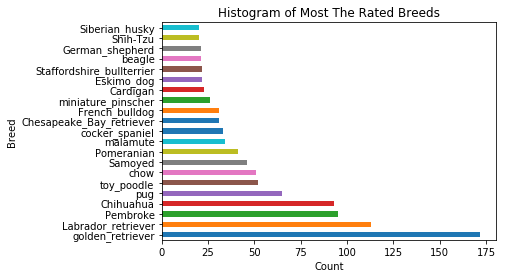

In [72]:
top_breeds=top_breeds.groupby('breed').filter(lambda x: len(x) >= 20)

top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')

1.171739130434783


Text(0,0.5,'Breed')

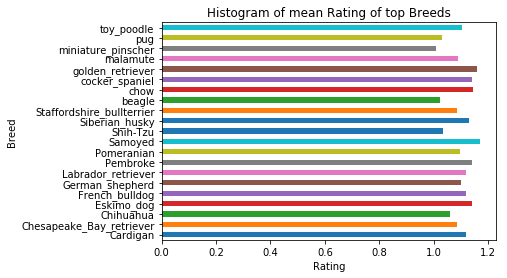

In [73]:
print(top_breeds.groupby('breed')['rating'].mean().max())
top_breeds.groupby('breed')['rating'].mean().plot(kind = 'barh')
plt.title('Histogram of mean Rating of top Breeds')
plt.xlabel('Rating')
plt.ylabel('Breed')



In [74]:
s = list(top_breeds['breed'].unique())

In [75]:
breed_analysis=pd.DataFrame(columns=['breed','number','rating','retweet','favorite'])
breed_analysis['breed']=s
for br in s:
    breed_df = df1_clean[df1_clean.breed==br]
    breed_analysis.loc[breed_analysis.breed== br,'number']=breed_df.shape[0]
    breed_analysis.loc[breed_analysis.breed== br,'rating']=breed_df['rating'].mean()
    breed_analysis.loc[breed_analysis.breed== br,'retweet']=breed_df['retweets'].mean()
    breed_analysis.loc[breed_analysis.breed== br,'favorite']=breed_df['favorites'].mean()


In [76]:
breed_analysis.head()

,breed,number,rating,retweet,favorite
0,Chihuahua,93,1.05914,2963.37,8216.82
1,Labrador_retriever,113,1.11947,4024.55,11053.3
2,Chesapeake_Bay_retriever,31,1.08387,2641.81,9888.61
3,Pomeranian,41,1.09512,2554.54,7246.49
4,Pembroke,95,1.14105,3014.88,10933.6


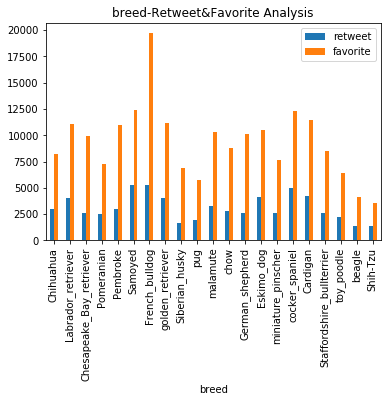

In [77]:
breed_analysis[['breed','retweet','favorite']].plot(x='breed',kind='bar',title='breed-Retweet&Favorite Analysis')

# Observation/Insights

> - There is positive correlation of 0.84 between retweets and favorites.
> - There is an increase in no of retweets and no. of favorites with rating.
> - I have analysed the dataset by grouping breeds. Most common breed was Golden Retriever
> - But Golden Retriver doesnot have highest mean rating .The highest mean rating dog was samoyed.
> - and the favorites and retweets was highest for french bulldog instead.